# Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


## Datasets :

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
df =pd.read_excel(r"F:\Drive\ExcelR\Assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Task

## Data Preprocessing:
    1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
    2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
    3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [5]:
#Check for missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [5]:
# Remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
df.shape

(3999, 12)

In [7]:
df_no_outliers.shape

(2875, 12)

In [8]:
# Scale Features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

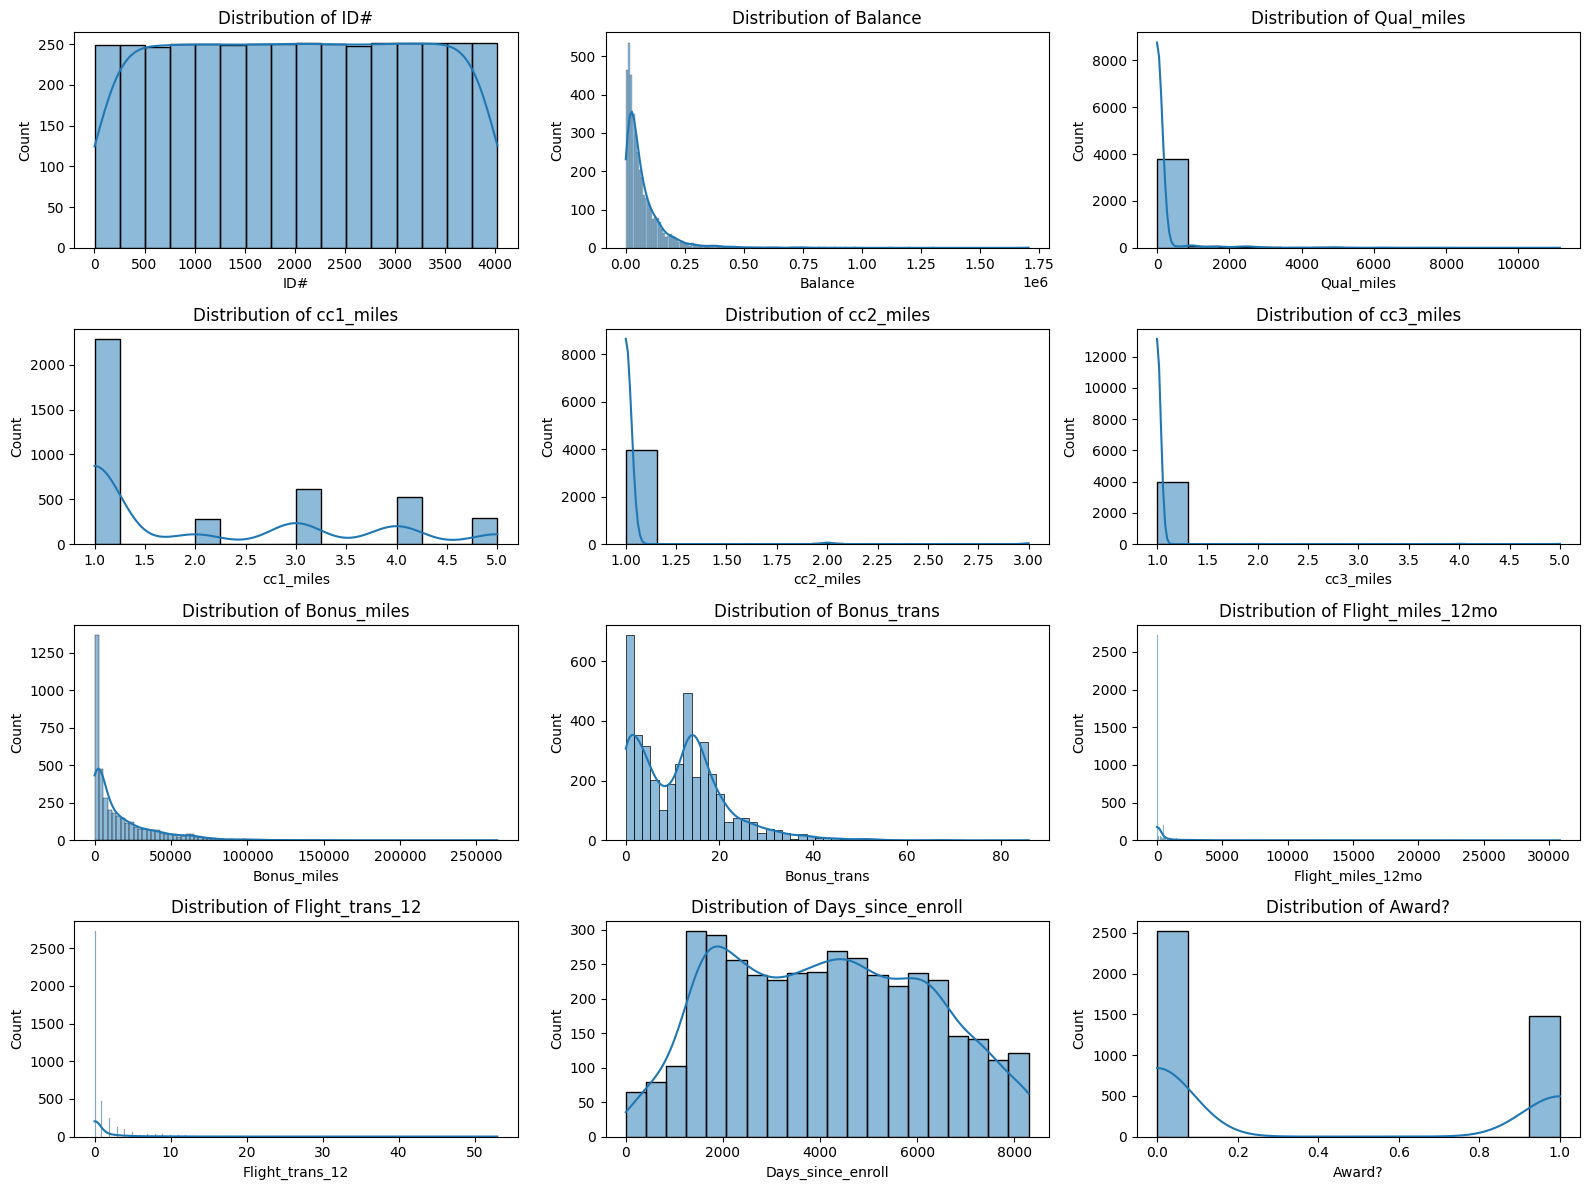

In [9]:
# Distribution Analysis - Histograms
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

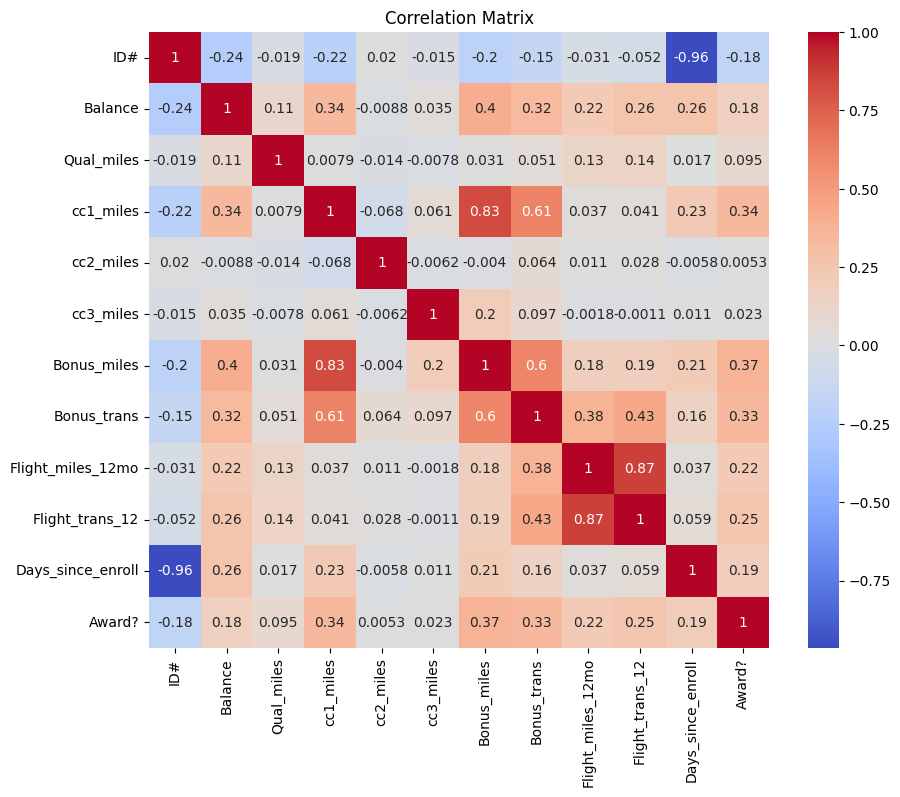

In [10]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

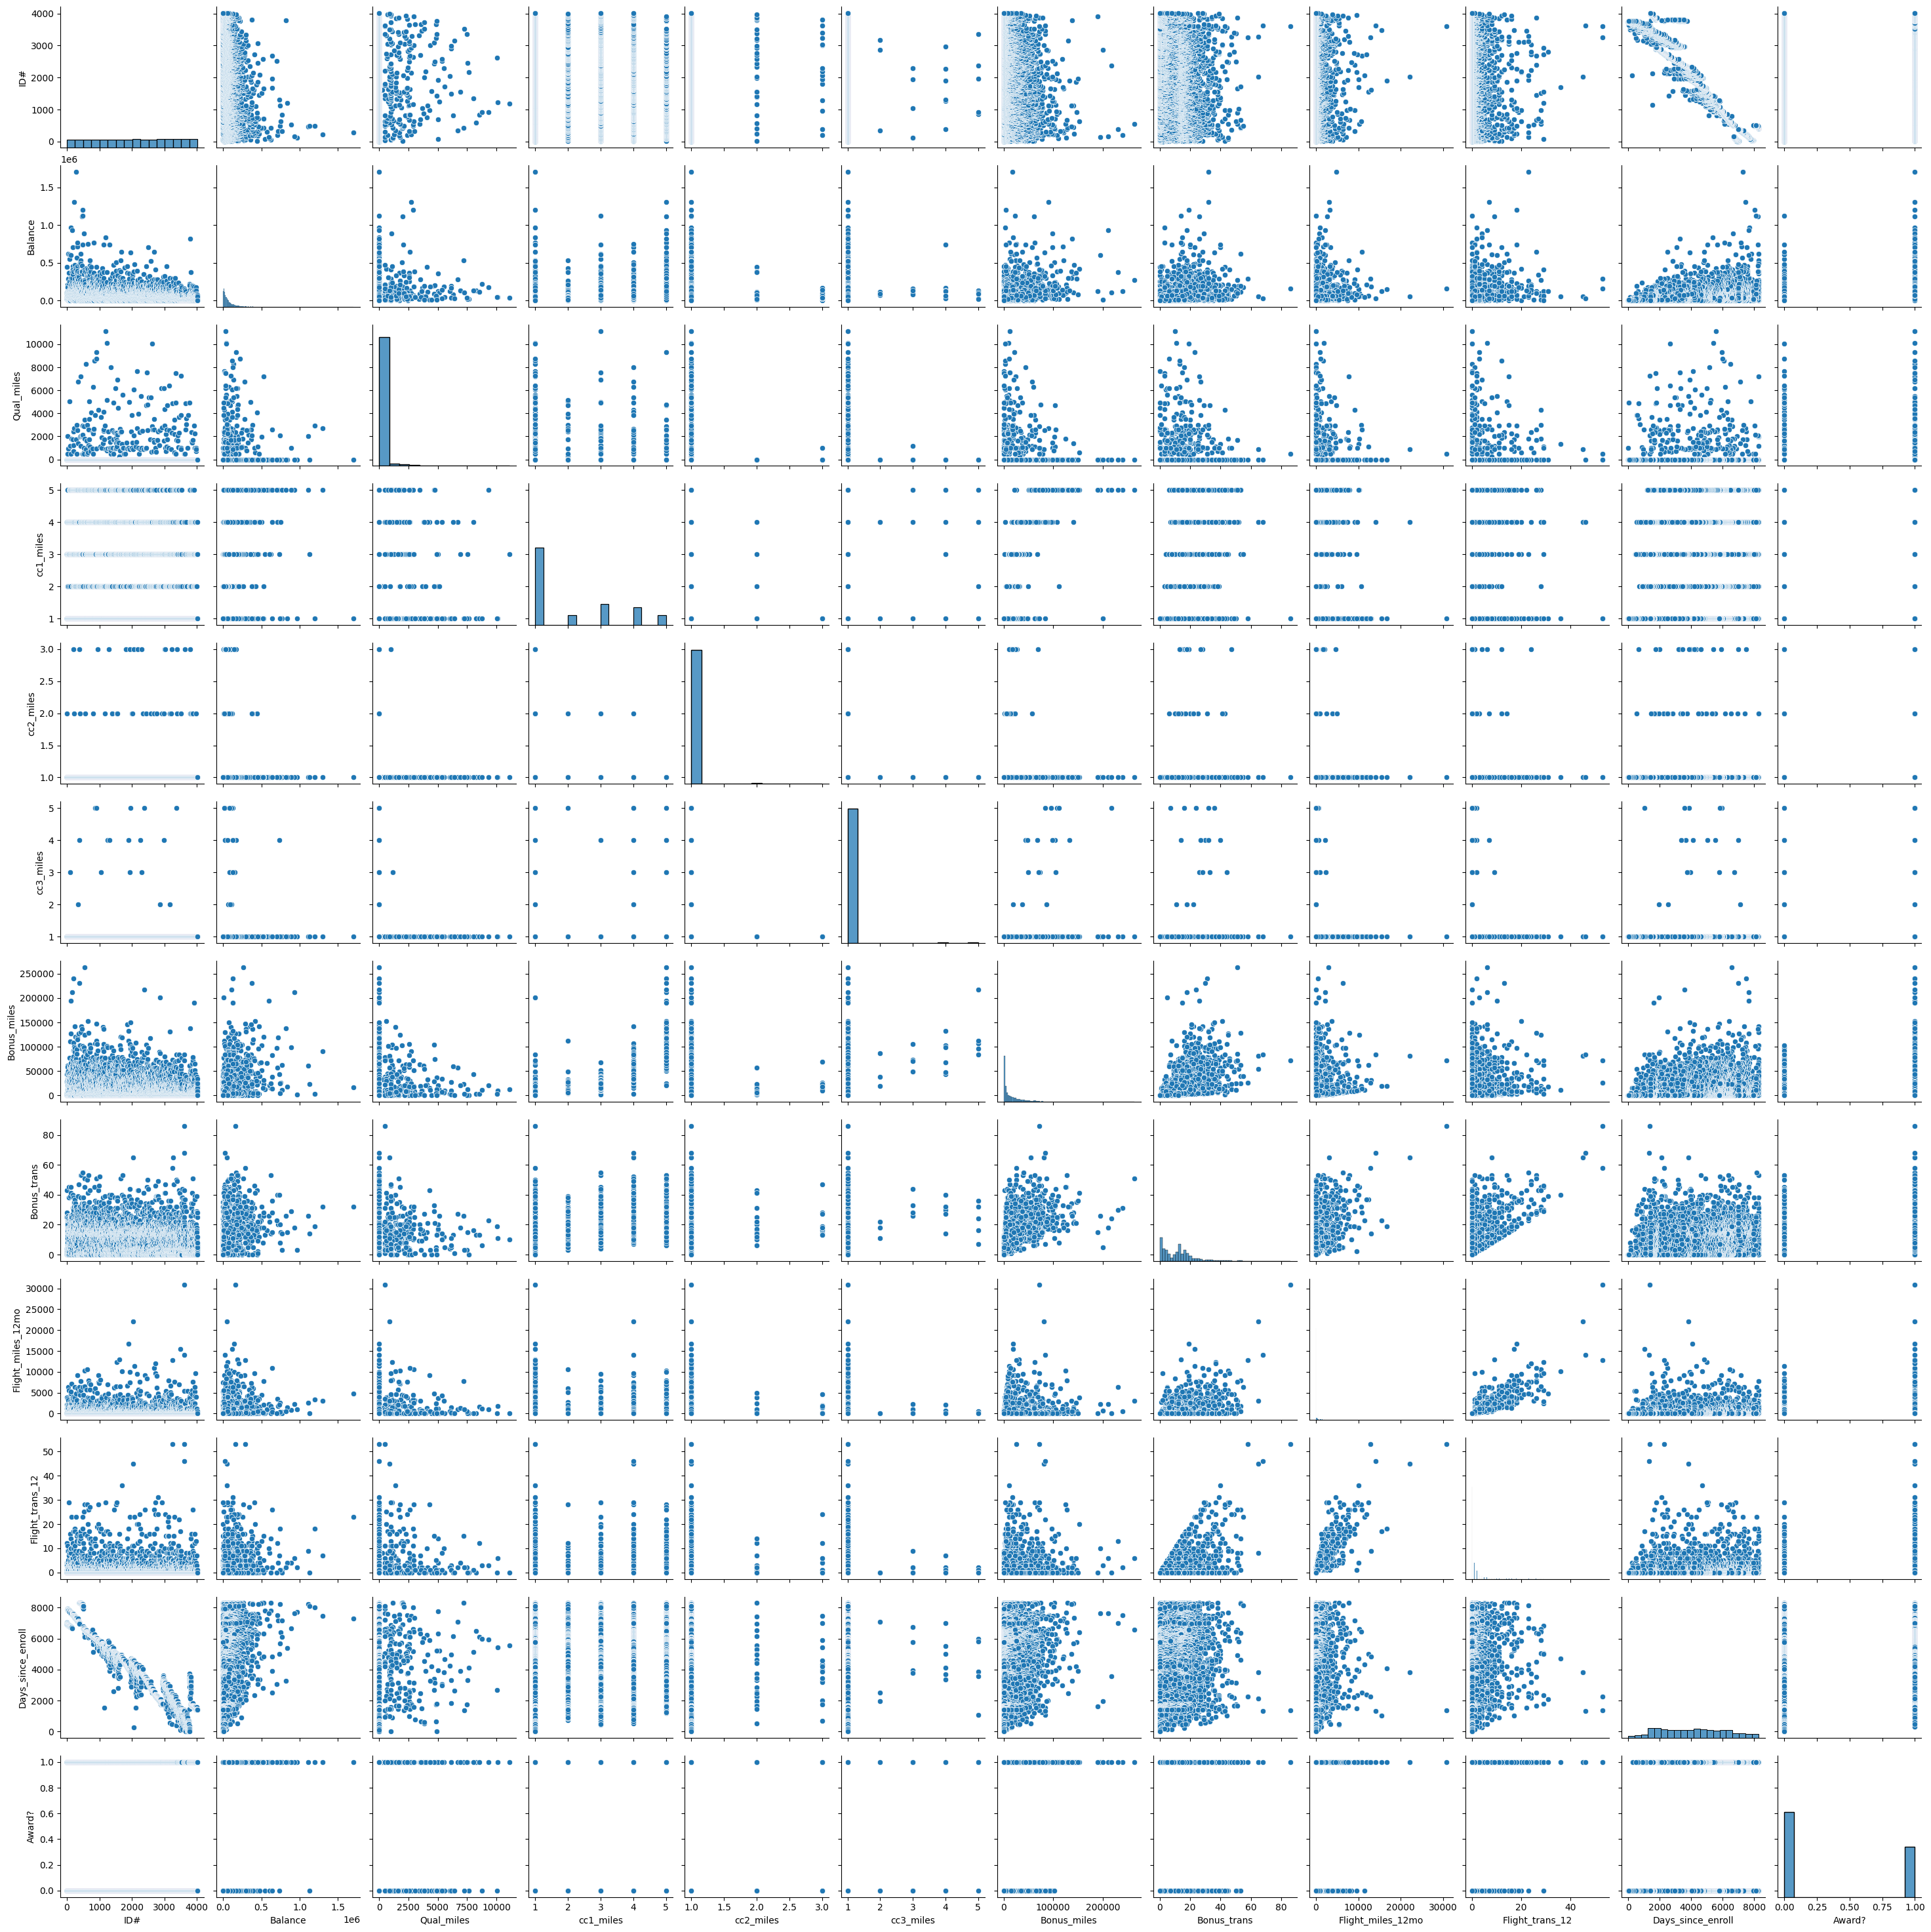

In [11]:
# pair plot
sns.pairplot(df)
plt.show()

## Implementing Clustering Algorithms:
    •	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
    •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
    •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results


In [12]:
#K-Means Clustering
wcss = []  # Within-cluster sum of squares
# Calculate wcss for a range of K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[25875.000000000004,
 19131.19454489433,
 15384.799585277087,
 14068.48085040961,
 11723.842777485974,
 10813.418272836094,
 9958.664797235433,
 9275.98840372898,
 8827.277592898312,
 8487.958425673121]

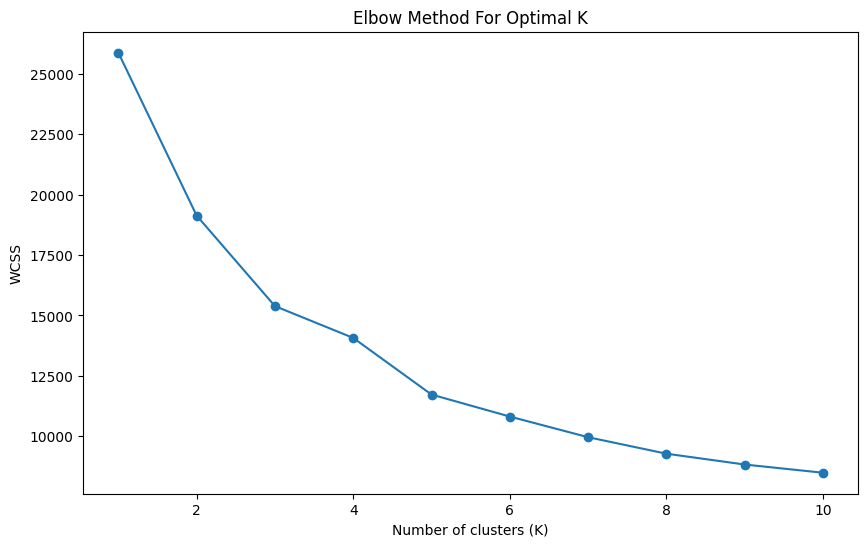

In [14]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Based on the Elbow Curve, choose an optimal K 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

In [16]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(df_scaled)

In [17]:
#  DBSCAN Clustering
# dbscan = DBSCAN(eps=0.3, min_samples=3)
# dbscan_clusters = dbscan.fit_predict(df_scaled)
# np.unique(dbscan_clusters)

In [18]:
# 3.3 DBSCAN Clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_clusters = dbscan.fit_predict(df_scaled)
# np.unique(dbscan_clusters)

In [19]:
# 3.3 DBSCAN Clustering
dbscan = DBSCAN(eps=0.7, min_samples=7)
dbscan_clusters = dbscan.fit_predict(df_scaled)
np.unique(dbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [20]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

## Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [21]:
#Analyze K-Means Clusters
print("K-Means Cluster Centers:\n", kmeans.cluster_centers_)

K-Means Cluster Centers:
 [[-0.07265457  0.43073018  0.          0.18816805  0.          0.
   0.24954578  0.30185492  2.42065252  2.27604824  0.08497532  0.36441803]
 [ 0.20553786 -0.42916685  0.         -0.64421776  0.          0.
  -0.59350178 -0.5193725  -0.35211824 -0.34194859 -0.21697001 -0.31678615]
 [-0.35824821  0.63224909  0.          1.13927049  0.          0.
   1.01796655  0.85618248 -0.33904964 -0.29826429  0.37473863  0.44740405]]


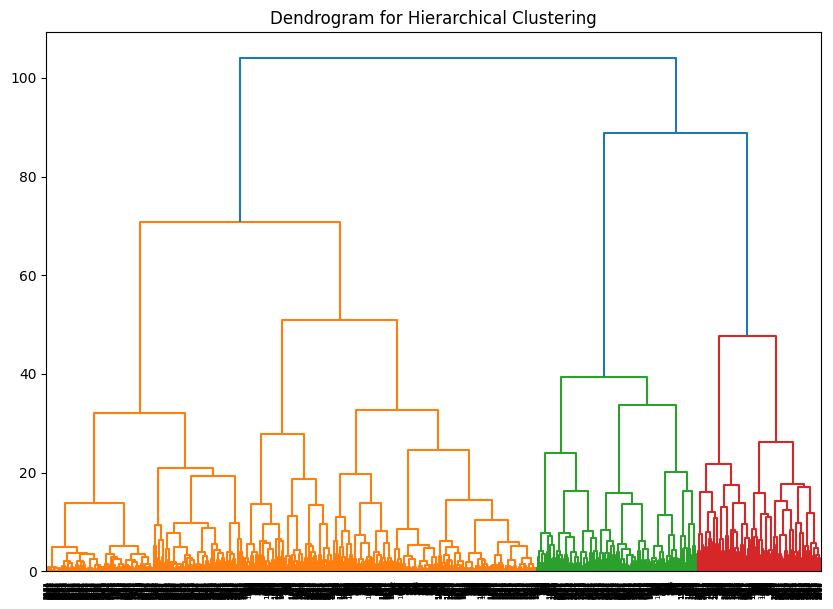

In [22]:
# Plot the dendrogram
linked = linkage(df_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [23]:
#  Analyze DBSCAN Clusters
print("DBSCAN Cluster Labels:\n", np.unique(dbscan_clusters))

DBSCAN Cluster Labels:
 [-1  0  1  2  3  4  5  6  7  8  9 10 11]


## Visualization:
    Visualize the clustering results using scatter plots or other suitable visualization techniques.
    Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


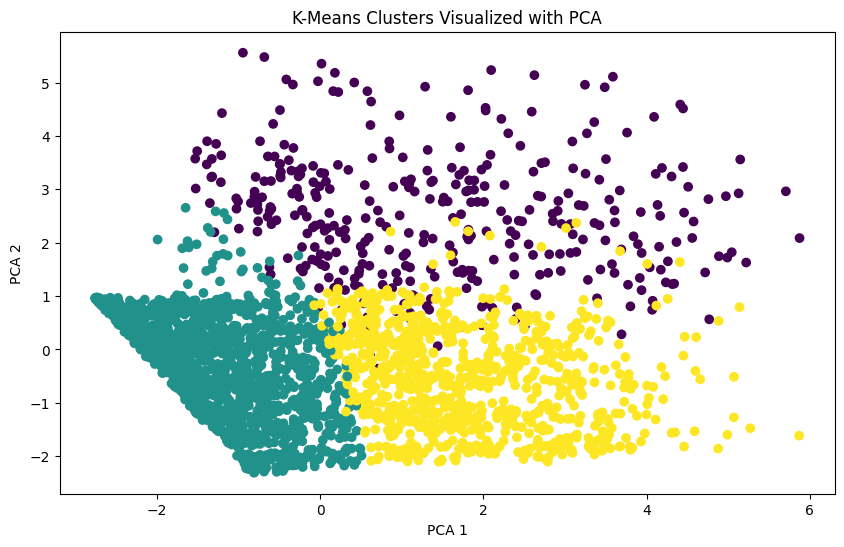

In [24]:
# Visualize PCA and Clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters Visualized with PCA')
plt.show()

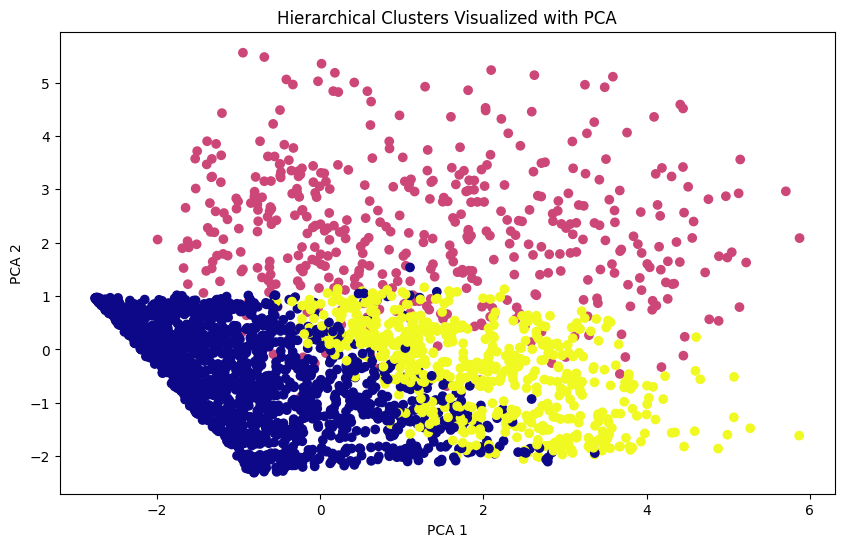

In [25]:
# Visualize PCA and Clusters for Hierarchical
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_clusters, cmap='plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Clusters Visualized with PCA')
plt.show()

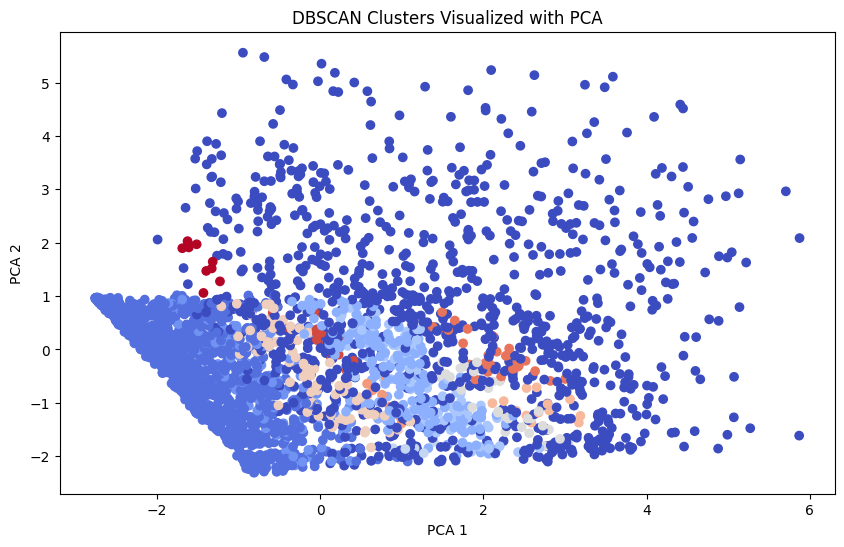

In [26]:
# Visualize PCA and Clusters for DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_clusters, cmap='coolwarm')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters Visualized with PCA')
plt.show()


## Evaluation and Performance Metrics:
    Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [27]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, kmeans_clusters)
print("Silhouette Score for K-Means:", silhouette_kmeans)

Silhouette Score for K-Means: 0.30830264215957265


In [28]:
# Silhouette Score for DBSCAN

dbscan_core_samples = df_scaled[dbscan_clusters != -1]# DBSCAN might label some points as noise (-1), so we exclude them for silhouette score calculation
dbscan_labels = dbscan_clusters[dbscan_clusters != -1]
silhouette_dbscan = silhouette_score(dbscan_core_samples, dbscan_labels)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

Silhouette Score for DBSCAN: 0.11580731304699067
